# Evolution of EUR-USD Exchange Rate

In this project, we will explore how the EUR to USD Exchange Rate has changed between 1999 and 2021. Ultimately, comparing the differences during the terms of the last three US presidents (Bush, Obama, Trump) using data visualization. 

An exchange rate is the comparison of the value of one currency compared to another. A currency appreciates if it takes more of another currency to buy it, and depreciates if it takes less of another currency to buy it. If the EUR-USD rate is 1.2, it can be interpreted as 1 Euro = 1.2 US Dollars.

The dataset used for this project can be found: [here](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
import numpy as np
import datetime as dt

In [2]:
# create dataframe
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

## Explore Data

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

## Clean Data

In [5]:
# clean up column names
clean_column = {}
for column in exchange_rates.columns:
    if column == exchange_rates.columns[0]:
        clean_column[column] = 'Time'
    c_column = column.replace('[','').replace(']','').strip().replace(' ','_')
    clean_column[column] = c_column
    
clean_column['Period\\Unit:'] = 'Time'

In [6]:
exchange_rates.rename(columns=clean_column, inplace=True)
exchange_rates.columns

Index(['Time', 'Australian_dollar', 'Bulgarian_lev', 'Brazilian_real',
       'Canadian_dollar', 'Swiss_franc', 'Chinese_yuan_renminbi',
       'Cypriot_pound', 'Czech_koruna', 'Danish_krone', 'Estonian_kroon',
       'UK_pound_sterling', 'Greek_drachma', 'Hong_Kong_dollar',
       'Croatian_kuna', 'Hungarian_forint', 'Indonesian_rupiah',
       'Israeli_shekel', 'Indian_rupee', 'Iceland_krona', 'Japanese_yen',
       'Korean_won', 'Lithuanian_litas', 'Latvian_lats', 'Maltese_lira',
       'Mexican_peso', 'Malaysian_ringgit', 'Norwegian_krone',
       'New_Zealand_dollar', 'Philippine_peso', 'Polish_zloty', 'Romanian_leu',
       'Russian_rouble', 'Swedish_krona', 'Singapore_dollar',
       'Slovenian_tolar', 'Slovak_koruna', 'Thai_baht', 'Turkish_lira',
       'US_dollar', 'South_African_rand'],
      dtype='object')

In [7]:
# convert time column to datetime object
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
# sort values by time column
exchange_rates.sort_values(by=['Time'], inplace=True)
# reset index
exchange_rates.reset_index(drop=True, inplace=True)

## Evolution of Euro to Dollar Exchange Rate

First we'll create a new dataframe to isolate the Euro to US Dollar exchange rates. Then we convert the exchange rates to float type after we remove rows where the exchange rate is missing.

In [8]:
# isolating Euro to US dollar xr
euro_to_dollar = exchange_rates[['Time','US_dollar']]
euro_to_dollar['US_dollar'].value_counts().head()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
Name: US_dollar, dtype: int64

In [9]:
# drop rows where no xr ('-') and converting to float
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

The below line plot shows the evolution of the Euro to US Dollar exchange rate between 1999 and 2021. We see it hit its lowest point: .82-.83 around 2001, and its highest: 1.5-1.6 around 2008.

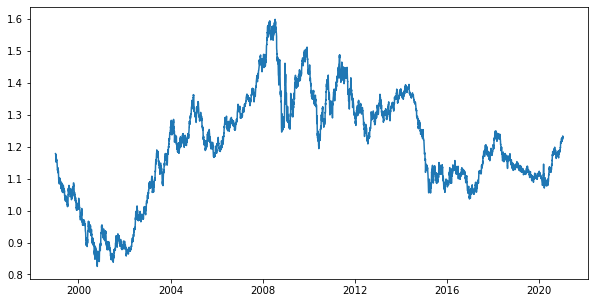

In [10]:
plt.figure(figsize=(10,5))
plt.plot(euro_to_dollar['Time'], 
         euro_to_dollar['US_dollar'])
plt.show()

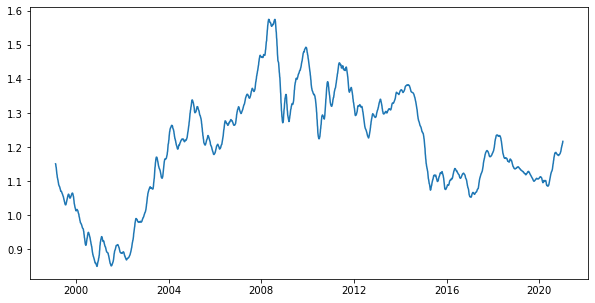

In [11]:
# use the rolling mean to smooth out our line plot
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

plt.figure(figsize=(10,5))
plt.plot(euro_to_dollar['Time'], 
         euro_to_dollar['rolling_mean'])
plt.show()

## EUR-USD During Presedential Terms

Below we'll highlight the changes in the Euro to USD exchange rate for the last three presendential candidates (Bush, Obama, Trump).

In [13]:
bush_to_trump = euro_to_dollar[euro_to_dollar['Time'].dt.year.between(2001, 2020)]

bush = bush_to_trump.copy()[bush_to_trump['Time'].dt.year < 2009]
obama = bush_to_trump.copy()[(bush_to_trump['Time'].dt.year >= 2009) & 
                             (bush_to_trump['Time'].dt.year < 2017)]
trump = bush_to_trump.copy()[(bush_to_trump['Time'].dt.year >= 2017) &
                             (bush_to_trump['Time'].dt.year < 2021)]

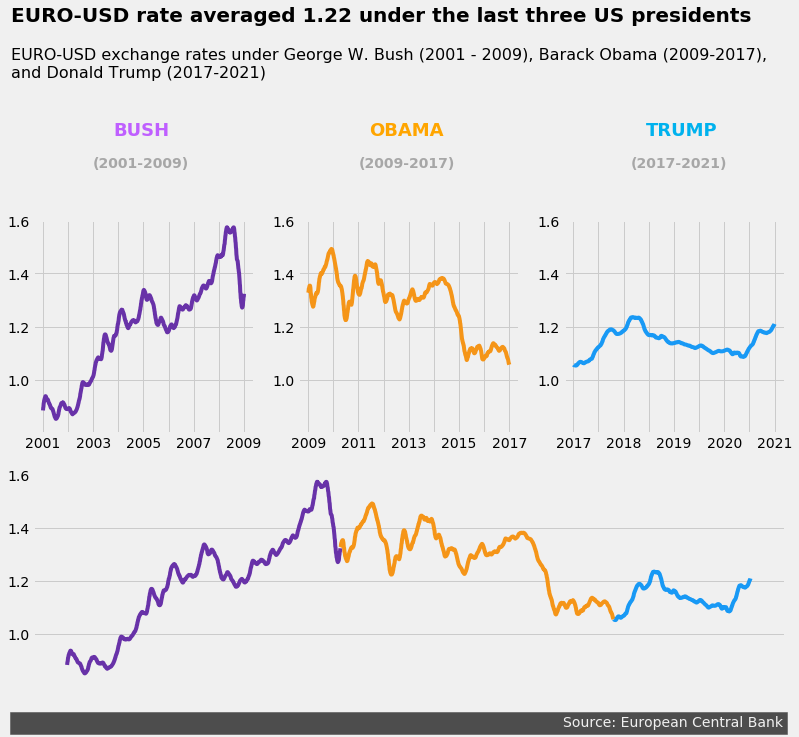

In [14]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.set_ylim(.8, 1.6)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'])
    
ax1.plot(bush['Time'], bush['rolling_mean'], color='#6832a8')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'])
ax1.text(731516.0, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)

ax2.plot(obama['Time'], obama['rolling_mean'], color='#f59518')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'])
ax2.text(734288.0, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(734138.0, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)

ax3.plot(trump['Time'], trump['rolling_mean'], color='#1899f5')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'])
ax3.text(736855.0, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(736745.0, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

ax4.plot(bush['Time'], bush['rolling_mean'],
         color='#6832a8')
ax4.plot(obama['Time'], obama['rolling_mean'],
         color='#f59518')
ax4.plot(trump['Time'], trump['rolling_mean'],
         color='#1899f5')
ax4.set_xticks([])
ax4.set_xticklabels([])

### Adding Title/Subtitle
ax1.text(730016.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

### Adding a signature
ax4.text(729916.0, 0.65, ' '*120 + '  Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)
plt.show()

The above graphic demonstrates the changes in the Euro to USD exchange rate over the terms of the last three US presidents. 
* Bush (2001-2009): We see the highest variability in the exchange rate during this period. The rate hits both it's highest (\~1.57) and lowest point (\~.85) from our dataset through this period.
* Obama (2009-2017): Starting off with some volatility in the first 5 years between 1.2 and 1.5 where the peak continues to lower. Finally, we see a drop to around 1.05 in 2015 and it stabilizes around there through the rest of his term.
* Trump (2017-2021): This is a 4 year term compared to the other president's 8 year terms. We see the least amount of change in the exchange rate during this period with a max of \~1.23 and minimum of \~1.05